In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from datetime import datetime as dt
%matplotlib inline
sns.set_style("white")

{datetime.datetime(2015, 8, 1, 0, 0): {'T8': 746, 'T9': 503, 'T6': 105, 'T7': 1281, 'T4': 197, 'T5': 185, 'T2': 2231, 'T3': 3527, 'T0': 1369, 'T1': 2042}, datetime.datetime(2016, 7, 1, 0, 0): {'T8': 22, 'T9': 6, 'T6': 5, 'T7': 22, 'T4': 8, 'T5': 1, 'T2': 38, 'T3': 323, 'T0': 16, 'T1': 19}, datetime.datetime(2015, 11, 1, 0, 0): {'T8': 2620, 'T9': 1771, 'T6': 227, 'T7': 3806, 'T4': 485, 'T5': 528, 'T2': 3250, 'T3': 8054, 'T0': 4477, 'T1': 4771}, datetime.datetime(2016, 8, 1, 0, 0): {'T8': 12, 'T9': 8, 'T6': 1, 'T7': 21, 'T4': 2, 'T5': 5, 'T2': 11, 'T3': 32, 'T0': 11, 'T1': 22}, datetime.datetime(2015, 2, 1, 0, 0): {'T8': 45, 'T9': 21, 'T6': 5, 'T7': 30, 'T4': 5, 'T5': 9, 'T2': 154, 'T3': 160, 'T0': 94, 'T1': 155}, datetime.datetime(2016, 1, 1, 0, 0): {'T8': 1769, 'T9': 694, 'T6': 101, 'T7': 1802, 'T4': 250, 'T5': 338, 'T2': 1798, 'T3': 4071, 'T0': 2353, 'T1': 2865}, datetime.datetime(2015, 6, 1, 0, 0): {'T8': 1119, 'T9': 700, 'T6': 179, 'T7': 1852, 'T4': 241, 'T5': 221, 'T2': 1257, 'T3':

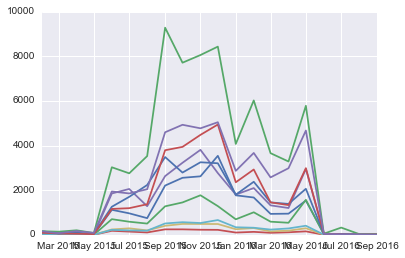

In [5]:
messages = "../Outputs/message_predictions.csv"
names = ["thread_id","date_time","message_id","user_id","language","type","body", "T0", "T1","T2","T3","T4","T5","T6","T7","T8","T9"]
prediction_strings = ["T0", "T1","T2","T3","T4","T5","T6","T7","T8","T9"]

import operator

messages_by_month = {}
with open(messages, "r") as f:
    reader = csv.DictReader(f, fieldnames=names)
    for row in reader:
        year_month_string = row["date_time"][:7]
        year_month = dt.strptime(year_month_string, "%Y-%m")
        predictions = {k: float(row[k]) for k in prediction_strings}
        chosen_prediction = max(predictions.iteritems(), key=operator.itemgetter(1))[0]
        if year_month not in messages_by_month:
            messages_by_month[year_month] = {}
        if chosen_prediction not in messages_by_month[year_month]:
            messages_by_month[year_month][chosen_prediction] = 0
        messages_by_month[year_month][chosen_prediction] += 1
print(messages_by_month)

year_months = sorted(messages_by_month.keys())

predictions_by_month = {}
for prediction in prediction_strings:
    predictions_by_month[prediction] = []
    for month in year_months:
        if prediction in messages_by_month[month]:
            predictions_by_month[prediction].append(messages_by_month[month][prediction])
        else:
            predictions_by_month[prediction].append(0)
print(predictions_by_month)
        

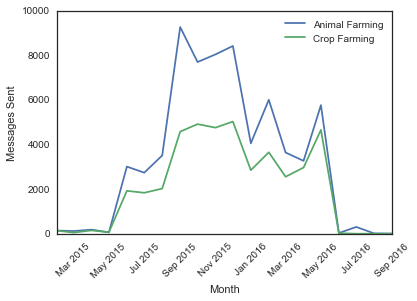

In [28]:
chosen_topics = ["T3", "T1"]
topic_titles = ["Animal Farming", "Crop Farming"]

with sns.color_palette("deep", 10):
    for pred, topic in zip(chosen_topics, topic_titles):
        plt.plot(year_months, predictions_by_month[pred], label=topic)
plt.legend()
locs, labels = plt.xticks()
plt.xlabel("Month")
plt.ylabel("Messages Sent")
plt.setp(labels, rotation=45)
plt.savefig("TopciTrendingSelected.png")
plt.show()

2015-02-27 00:00:00 T3    160
T1    155
T2    154
T0    120
T7     30
T9     21
T8     19
T5      9
T4      5
T6      5
Name: topic, dtype: int64


ValueError: x and y must have same first dimension

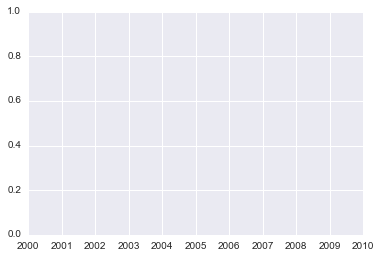

In [71]:
#message_score_with_max.index=message_score_with_max['date_time']
import calendar
import datetime
message_score_with_max["year_month"] = message_score_with_max['date_time'].map(
    lambda x: datetime.datetime(
        x.year,
        x.month,
        max(calendar.monthcalendar(x.year, x.month)[-1][:5])
    )
)
message_score_with_max.head(10)
# pd.groupby(message_score_with_max,by=["year_month", "topic"]).count().plot(x="year_month", y="thread_id")

data = message_score_with_max.groupby('year_month')
# data = pd.groupby(message_score_with_max,by=["year_month", "topic"])

for i, group in data:
    counts = group["topic"].value_counts()
    print i, group["topic"].value_counts()
    #plt.figure()
    #group.plot(x='topic', y='MeanToDate', title=str(i))
    plt.plot(i, counts)
plt.show()
